## Demand Classification based on forcastability of products

### Forecast accuracy strongly depends upon the product forcastability. To determine this,we apply two coefficients:

* Average Demand Interval (ADI)- it measures the demand regularity in time by computing the average inerval between two demands.
* Square of Coefficient of variation(CV^2)- it measures the variation in quantities.

Based on these 2 dimensions, we can classify demand profiles into 4 categories:

a) Smooth demand (ADI < 1.32 and CV² < 0.49)- The demand is regular in time and in quantity. It is therefore easy to forecast with a low forecasting error level. 

b) Intermittent demand (ADI >= 1.32 and CV² < 0.49)- The demand history shows very little variation in demand quantity but a high variation in the interval between two demands. Though specific forecasting methods tackle intermittent demands, the forecast error margin is higher.

c) Erratic demand (ADI < 1.32 and CV² >= 0.49)-The demand has regular occurrences in time with high quantity variations. The forecast accuracy remains shaky.

d) Lumpy demand (ADI >= 1.32 and CV² >= 0.49). The demand is characterized by a large variation both in quantity and time. It is actually impossible to produce a reliable forecast, no matter which forecasting tools we use.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../data_raw/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [4]:
df = df[df["sales"] != 0]

In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df['dayofweek']=df['date'].dt.dayofweek

In [7]:
df['dayofweek'].value_counts()

dayofweek
5    301750
0    296255
1    295542
2    292950
4    292382
3    292084
6    290795
Name: count, dtype: int64

In [8]:
df['date']=df['date'].dt.strftime('%Y-%m-%d')

In [9]:
df['date']=pd.to_datetime(df['date'])

## Coefficient of Variance Squared (CV2)

In [10]:
## Grouping retail sku's to identify datewise sales

retail_grouped= df.groupby(['family','date']).agg(total_sale=('sales','sum')).reset_index()

In [11]:
# Calulating average and standard deviation

cv_data = retail_grouped.groupby('family').agg(average=('total_sale','mean'),
                                                    sd=('total_sale','std')).reset_index()

In [12]:
## Calculating CV_squared

cv_data['cv_sqr'] = (cv_data['sd']/cv_data['average'])**2
cv_data

,family,average,sd,cv_sqr
0,AUTOMOTIVE,329.662507,108.361756,0.108047
1,BABY CARE,11.280584,7.709753,0.467108
2,BEAUTY,200.649050,100.410387,0.250428
3,BEVERAGES,128832.830166,63121.645563,0.240051
4,BOOKS,22.432056,23.892564,1.134455
5,BREAD/BAKERY,25020.157706,6511.795916,0.067736
6,CELEBRATION,746.984298,236.096684,0.099898
7,CLEANING,57910.504157,15211.880756,0.069000
8,DAIRY,38294.364014,13725.805476,0.128471
9,DELI,14317.293628,4171.725802,0.084900


## Average Demand Interval (ADI) per Product

In [13]:
prod_by_date= df.groupby(['family','date']).agg(count=('family','count')).reset_index()

In [14]:
skus=prod_by_date.family.value_counts()

In [15]:
## Product sku's list

skus

family
DAIRY                         1684
DELI                          1684
MEATS                         1684
PERSONAL CARE                 1684
GROCERY II                    1684
GROCERY I                     1684
FROZEN FOODS                  1684
EGGS                          1684
LINGERIE                      1684
LAWN AND GARDEN               1684
CLEANING                      1684
POULTRY                       1684
BREAD/BAKERY                  1684
PREPARED FOODS                1684
BEVERAGES                     1684
BEAUTY                        1684
AUTOMOTIVE                    1683
SEAFOOD                       1683
HARDWARE                      1681
HOME APPLIANCES               1655
PRODUCE                       1610
LIQUOR,WINE,BEER              1506
HOME AND KITCHEN I            1170
HOME AND KITCHEN II           1170
MAGAZINES                     1080
HOME CARE                     1047
PET SUPPLIES                  1026
PLAYERS AND ELECTRONICS       1019
CELEBRATION  

In [16]:
new_df= pd.DataFrame()

In [17]:
for i in range(len(skus.index)):
    a= prod_by_date[prod_by_date['family']==skus.index[i]]
    a['previous_date']=a['date'].shift(1)
    new_df=pd.concat([new_df,a],axis=0)

/var/folders/7q/xcs7m4xn0w30wtrd9jmq9_3m0000gn/T/ipykernel_3307/2099727374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=a['date'].shift(1)
/var/folders/7q/xcs7m4xn0w30wtrd9jmq9_3m0000gn/T/ipykernel_3307/2099727374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=a['date'].shift(1)
/var/folders/7q/xcs7m4xn0w30wtrd9jmq9_3m0000gn/T/ipykernel_3307/2099727374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47503 entries, 10616 to 6228
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   family         47503 non-null  object        
 1   date           47503 non-null  datetime64[ns]
 2   count          47503 non-null  int64         
 3   previous_date  47470 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.8+ MB


In [19]:
new_df['duration']=new_df['date']- new_df['previous_date']

In [20]:
new_df['Duration']=new_df['duration'].astype(str).str.replace('days','')

In [21]:
new_df['Duration']=pd.to_numeric(new_df['Duration'],errors='coerce')

In [22]:
## Calculating ADI

ADI = new_df.groupby('family').agg(ADI = ('Duration','mean')).reset_index()

In [23]:
ADI

,family,ADI
0,AUTOMOTIVE,1.002378
1,BABY CARE,1.419101
2,BEAUTY,1.002377
3,BEVERAGES,1.002377
4,BOOKS,1.080420
5,BREAD/BAKERY,1.002377
6,CELEBRATION,1.298625
7,CLEANING,1.002377
8,DAIRY,1.002377
9,DELI,1.002377


In [24]:
## Cross validation

adi_cv=pd.merge(ADI,cv_data)

In [25]:
adi_cv

,family,ADI,average,sd,cv_sqr
0,AUTOMOTIVE,1.002378,329.662507,108.361756,0.108047
1,BABY CARE,1.419101,11.280584,7.709753,0.467108
2,BEAUTY,1.002377,200.649050,100.410387,0.250428
3,BEVERAGES,1.002377,128832.830166,63121.645563,0.240051
4,BOOKS,1.080420,22.432056,23.892564,1.134455
5,BREAD/BAKERY,1.002377,25020.157706,6511.795916,0.067736
6,CELEBRATION,1.298625,746.984298,236.096684,0.099898
7,CLEANING,1.002377,57910.504157,15211.880756,0.069000
8,DAIRY,1.002377,38294.364014,13725.805476,0.128471
9,DELI,1.002377,14317.293628,4171.725802,0.084900


In [26]:
## Defining a fuction for categorization

def category(df):
    a=0
    
    if((df['ADI']<=1.34) & (df['cv_sqr']<=0.49)):
        a='Smooth'
    if((df['ADI']>=1.34) & (df['cv_sqr']>=0.49)):  
        a='Lumpy'
    if((df['ADI']<1.34) & (df['cv_sqr']>0.49)):
        a='Erratic'
    if((df['ADI']>1.34) & (df['cv_sqr']<0.49)):
        a='Intermittent'
    return a

In [27]:
## Categorizing products based on their forcastability

adi_cv['category']=adi_cv.apply(category,axis=1)

## Conclusion: Final list of sku's categorized based on their forcastability.

In [32]:
## Categorized list

adi_cv.head()

,family,ADI,average,sd,cv_sqr,category
0,AUTOMOTIVE,1.002378,329.662507,108.361756,0.108047,Smooth
1,BABY CARE,1.419101,11.280584,7.709753,0.467108,Intermittent
2,BEAUTY,1.002377,200.649050,100.410387,0.250428,Smooth
3,BEVERAGES,1.002377,128832.830166,63121.645563,0.240051,Smooth
4,BOOKS,1.080420,22.432056,23.892564,1.134455,Erratic


In [29]:
import seaborn as sns

<Axes: xlabel='cv_sqr', ylabel='ADI'>

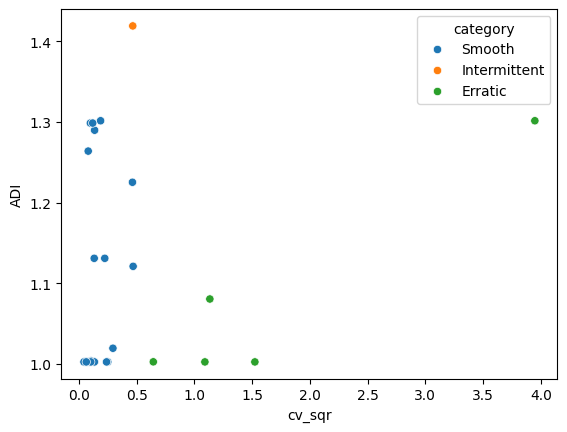

In [30]:
## Visualizing the categories

sns.scatterplot(x='cv_sqr',y='ADI',hue='category',data=adi_cv)

In [31]:
## Final category counts

adi_cv.category.value_counts()

category
Smooth          27
Erratic          5
Intermittent     1
Name: count, dtype: int64